In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../data')
from dataLoader import loadDataframe

Import datas

In [2]:
path_to_directory = '../../data/cleanData/'
df_movies = loadDataframe('movies', path_to_directory)
df_characters = loadDataframe('characters', path_to_directory)
df_clusters = loadDataframe('clusters', path_to_directory)
df_summaries = loadDataframe('summaries', path_to_directory)

# Data exploration

### Genres exploration

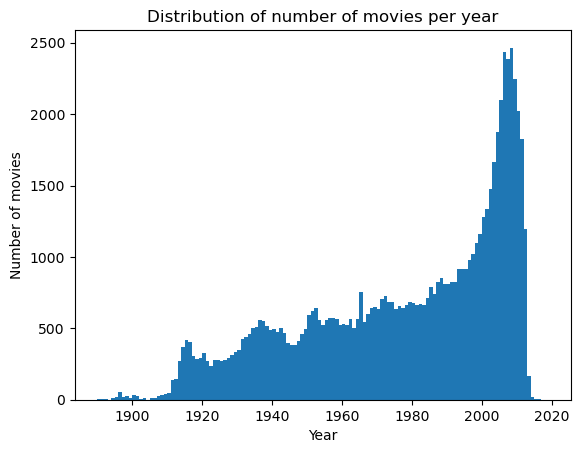

In [3]:
# Distribution of number of movies per year
plt.hist(df_movies['release_date'].dt.year, bins=range(1890, 2020, 1))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Distribution of number of movies per year')
plt.show()

The total movies produced per year increases over time.

In [4]:
df_genres_countries_exploded = df_movies.explode('genres').explode('countries')
df_genres_countries_exploded.head(3)

,wiki_id,freebase_id,original_title,release_date,revenue,runtime,languages,countries,genres,countries_freebase_id,languages_freebase_id,genres_freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Thriller,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Science Fiction,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Horror,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."


In [5]:
print("Number of unique genres: ", df_genres_countries_exploded['genres'].nunique())

print(df_genres_countries_exploded['genres'].unique())


Number of unique genres:  363
['Thriller' 'Science Fiction' 'Horror' 'Adventure' 'Supernatural' 'Action'
 'Space western' 'Mystery' 'Biographical film' 'Drama' 'Crime Drama'
 'Crime Fiction' 'Erotic thriller' 'Psychological thriller' 'Short Film'
 'Silent film' 'Indie' 'Black-and-white' 'Comedy' 'Family Film' 'Fantasy'
 'World cinema' 'Musical' 'Japanese Movies' 'Action/Adventure'
 'Romantic comedy' 'Ensemble Film' 'Comedy-drama' 'Romantic drama'
 'Romance Film' 'Costume drama' 'War film' 'Epic' 'Period piece'
 'Film adaptation' 'Animation' "Children's/Family" "Children's Fantasy"
 nan 'Future noir' 'Comedy film' 'Coming of age' 'Suspense'
 'Crime Thriller' 'Black comedy' 'Bollywood' 'Marriage Drama' 'Wuxia'
 'Martial Arts Film' 'Chinese Movies' 'Western' 'Parody' 'Mockumentary'
 'Fan film' 'Cult' 'Adventure Comedy' 'Slapstick' 'Biopic [feature]'
 'Historical Epic' 'Sports' 'Family Drama' 'Political drama'
 'Historical fiction' 'Courtroom Drama' 'Culture & Society' 'Biography'
 'Docume

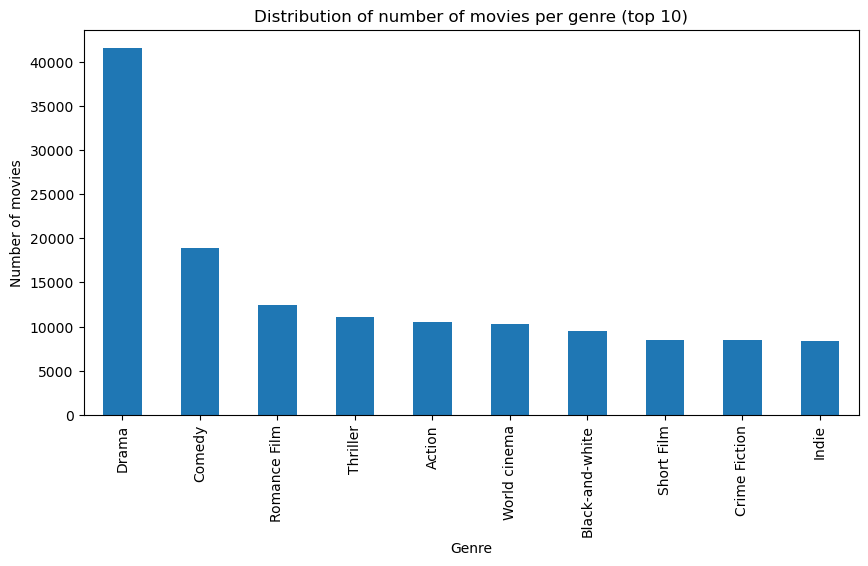

In [6]:
# Distribution of number of movies per genre (top 10)
plt.figure(figsize=(10, 5))
df_genres_countries_exploded['genres'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Distribution of number of movies per genre (top 10)')
plt.show()


There are a lot of different genres in the dataset (363). The most common genres are Drama, Comedy and Romance. In the dataset, we see that some genres are quiet similar (e.g. Gay, Gay Interest, Gay Themed). In our future analysis, we could group these genres together to have a more accurate analysis.

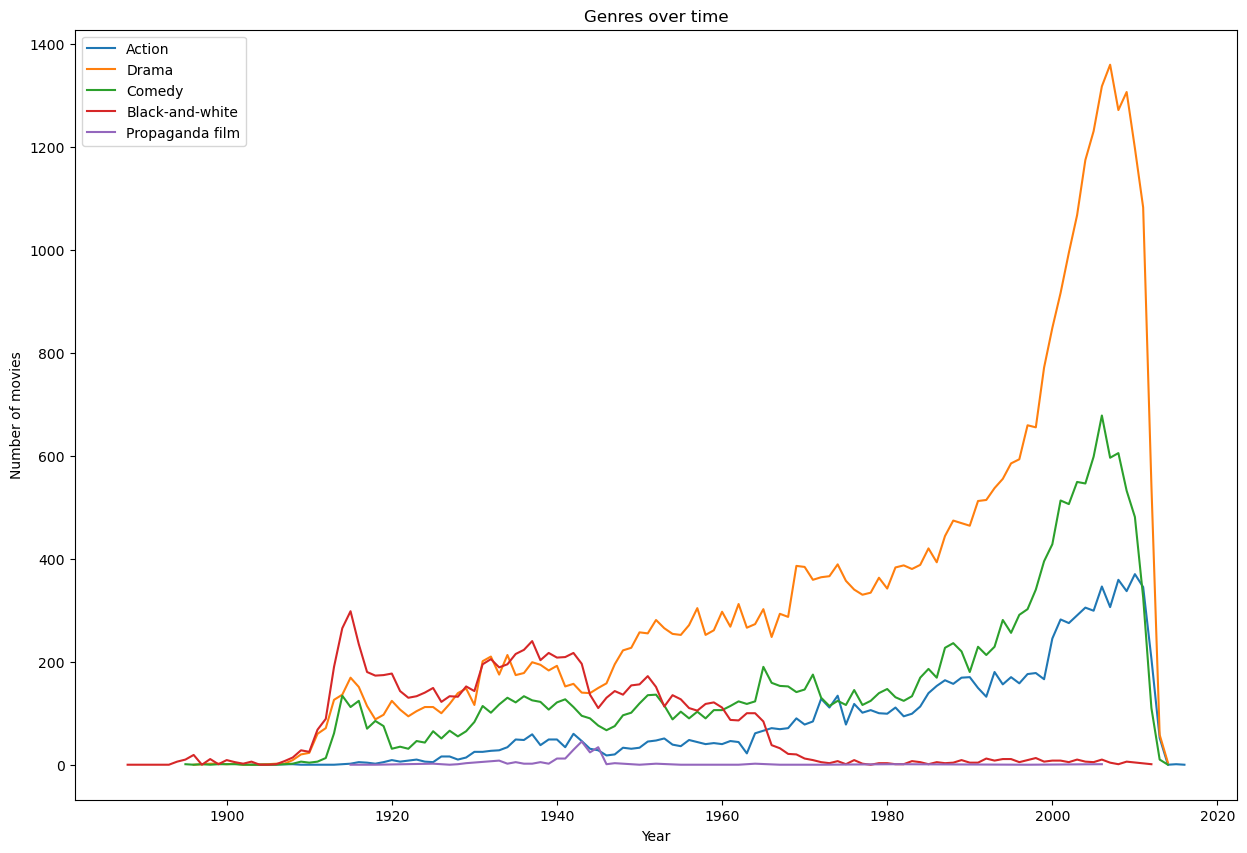

In [7]:
# Genres over time
genres = ['Action', 'Drama', 'Comedy', 'Black-and-white','Propaganda film'] 

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for genre in genres:
    df_genre = df_genres_countries_exploded[df_genres_countries_exploded['genres'] == genre]
    df_genre = df_genre.groupby(df_genre['release_date'].dt.year).size()
    df_genre.plot(ax=ax, label=genre)
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Genres over time')
plt.legend()
plt.show()

On the previous graph, we can see the evolution for the whole world of the number of movies per genres produced over time. Some genres are decreasing over time (e.g. Black and White), some genres appear temporarly (e.g. Propaganda film) and some genres are increasing over time (e.g. Action, Drama).

In [19]:
df_genres_countries_exploded.head()

,wiki_id,freebase_id,original_title,release_date,revenue,runtime,languages,countries,genres,countries_freebase_id,languages_freebase_id,genres_freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Thriller,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Science Fiction,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Horror,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Adventure,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,Supernatural,['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."


C:\Users\arnau\AppData\Local\Temp\ipykernel_11460\675473540.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\arnau\AppData\Local\Temp\ipykernel_11460\675473540.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\arnau\AppData\Local\Temp\ipykernel_11460\675473540.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

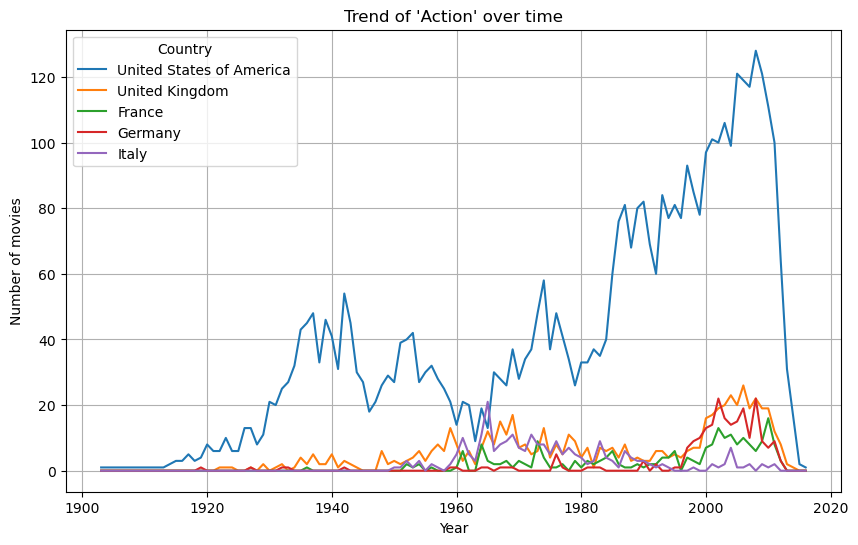

In [20]:
# Genre evolution per country
def plotGenreTrend(df, countries, genre):
    df_filtered = df[(df['genres'] == genre) & (df['countries'].isin(countries))]
    df_filtered['release_date'] = pd.to_datetime(df_filtered['release_date'], errors='coerce')
    df_filtered.dropna(subset=['release_date'], inplace=True)
    df_filtered['year'] = df_filtered['release_date'].dt.year
    trend_data = df_filtered.groupby(['countries', 'year']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(10, 6))
    for country in countries:
        if country in trend_data.index:
            plt.plot(trend_data.columns, trend_data.loc[country], label=country)
    
    plt.title(f"Trend of '{genre}' over time")
    plt.xlabel("Year")
    plt.ylabel("Number of movies")
    plt.legend(title="Country")
    plt.grid(True)
    plt.show()
    
countries = ['United States of America', 'United Kingdom', 'France', 'Germany', 'Italy']
genre = 'Action'
plotGenreTrend(df_genres_countries_exploded, countries, genre)

In the previous graph, we can see an example of the evolution of the number of movies produced for genre 'Action' over time for different countries. It is noted that the United States is a pioneer in the production of action films and that after the explosion of action films in the United States, other countries followed the trend, which may indicate an influence of the United States on other countries and be linked to globalization.

### Topic Modeling Bertopic

In [12]:
!pip install bertopic
!pip install sentence-transformers
!pip install nltk spacy
!python -m spacy download en_core_web_sm

   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   --------------- ------------------------ 16.3/42.2 MB 78.8 MB/s eta 0:00:01
   --------------------------- ------------ 29.4/42.2 MB 71.5 MB/s eta 0:00:01
   ---------------------------------------  42.2/42.2 MB 72.6 MB/s eta 0:00:01
   ---------------------------------------- 42.2/42.2 MB 58.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ---------------------------------------- 5.7/5.7 MB 58.3 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Ignoring numpy: markers 'python_version >= "3.9"' don't match your environment
        Using cached setuptools-75.3.0-py3-none-any.whl.metadata (6.9 kB)
           ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
           ---------------------------------------- 3.6/3.6 MB 52.6 MB/s eta 0:00:00
        Installing build dependencies: started
        Installing build dependencies: finished with status 'error'
        error: subprocess-exited-with-error
      
        × pip subprocess to install build dependencies did not run successfully.
        │ exit code: 1
        ╰─> [7 lines of output]
              Using cached setuptools-75.3.0-py3-none-any.whl.metadata (6.9 kB)
            ERROR: Ignored the following versions that require a different python version: 1.25.0 Requires-Python >=3.9; 1.25.1 Requires-

In [13]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from tqdm import tqdm

# Load the spaCy model for English language
nlp = spacy.load("en_core_web_sm")

# Download stopwords and punkt tokenizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load the English stopwords
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Tokenisation
    doc = nlp(text.lower())  # Convert to lowercase
    
    # Lemmatisation and remove stopwords and punctuation
    processed_tokens = [
        token.lemma_ for token in doc if token.text not in stop_words and token.text not in string.punctuation
    ]
    
    return " ".join(processed_tokens)

ModuleNotFoundError: No module named 'srsly.ujson.ujson'

In [64]:
# Apply the preprocessing to the summaries
tqdm.pandas()
df_summaries['cleaned_summary'] = df_summaries['summary'].progress_apply(preprocess_text)
df_summaries.to_csv('../../data/nlpData/lemmatized_summaries.csv')

100%|██████████| 42303/42303 [40:59<00:00, 17.20it/s]  


In [65]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [77]:
df_summaries_small = df_summaries.sample(1000)

In [78]:
# Create the SentenceTransformer model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode the summaries
embeddings = embedding_model.encode(df_summaries_small['cleaned_summary'].tolist(), show_progress_bar=True)

# Create the BERTopic model
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)

# Fit the BERTopic model
topics, probabilities = topic_model.fit_transform(df_summaries_small['cleaned_summary'].tolist())

# Assign the topics to the summaries
df_summaries_small['topic'] = topics

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-13 21:13:12,799 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-13 21:14:01,989 - BERTopic - Embedding - Completed ✓
2024-11-13 21:14:01,995 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-13 21:14:05,554 - BERTopic - Dimensionality - Completed ✓
2024-11-13 21:14:05,554 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-13 21:14:05,600 - BERTopic - Cluster - Completed ✓
2024-11-13 21:14:05,603 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-13 21:14:05,836 - BERTopic - Representation - Completed ✓


In [79]:
# Display the topics
topic_info = topic_model.get_topic_info()
print(topic_info)

# Visualize the topics
topic_model.visualize_topics()

    Topic  Count                             Name  \
0      -1    466              -1_go_take_find_one   
1       0    202              0_find_tell_go_take   
2       1    101        1_love_father_get_village   
3       2     60           2_film_war_soldier_man   
4       3     53  3_father_wife_love_relationship   
5       4     30            4_bug_tom_jerry_elmer   
6       5     23   5_murder_evans_christie_police   
7       6     23   6_dastan_tamina_michiru_dagger   
8       7     19       7_story_woman_chopin_mayil   
9       8     13     8_ship_boat_captain_finnegan   
10      9     10     9_stooge_droopy_curly_elaine   

                                       Representation  \
0   [go, take, find, one, get, leave, film, man, f...   
1   [find, tell, go, take, leave, get, see, one, k...   
2   [love, father, get, village, marry, family, ta...   
3   [film, war, soldier, man, german, d8, british,...   
4   [father, wife, love, relationship, max, life, ...   
5   [bug, tom, jerry,